# Notas
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.   Entonces es importante poner atencion si es S o P /n

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.    $$$$$$$

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. $$$$$$$$$$$2

Name - The first and last names of the passenger.





Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


Queremos predecir la columna Transported, que de hecho es un valor binario

In [34]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas_profiling import ProfileReport

In [35]:
df=pd.read_csv("train.csv")

In [36]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [37]:
df["Transported"]

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [38]:
df.info()  #Notemos que hay muchos valores faltantes, pues hay 8693 entradas en total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [39]:
profile = ProfileReport(df, title="Spaceship titanic")

In [40]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
df[df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [42]:
df['Cabin'].apply(lambda x: str(x).split('/'))[0] #No se puede separar por que hay valores faltantes entonces no cumplen con el estandar

['B', '0', 'P']

In [43]:
df[df['Cabin'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False


In [44]:
def split_cabin(x):
    if len(str(x).split('/'))< 3:
        return ['Missing','Missing','Missing']
    else:
        return str(x).split('/')

In [45]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [46]:
df.drop('TempCabin',axis=1,inplace=True)

KeyError: "['TempCabin'] not found in axis"

In [47]:
def preprocesado(df):
    #Primero rellenamos los valores faltantes
    df['HomePlanet'].fillna('Missing',inplace=True)
    #Procesado de Cabin
    df['TempCabin']=df['Cabin'].apply(lambda x: split_cabin(x))
    df['Deck']=df['TempCabin'].apply(lambda x: x[0])
    df['Side']=df['TempCabin'].apply(lambda x: x[2])
    df.drop(['TempCabin','Cabin'],axis=1,inplace=True)
    #procesado de Destination
    df['Destination'].fillna('Missing',inplace=True)
    #procesando Age
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    #VIP posiblemete borremos los valores faltantes
    
    #Para todo lo que han gastado dinero, vamos a llenar con 0 los valores faltantes
    df['RoomService'].fillna(0,inplace=True)
    df['FoodCourt'].fillna(0,inplace=True)
    df['ShoppingMall'].fillna(0,inplace=True)
    df['Spa'].fillna(0,inplace=True)
    df['VRDeck'].fillna(0,inplace=True)
    #procesando Name, vamos a dropear la columna
    df.drop('Name',axis=1,inplace=True)
    #Dropear los valores Na restantes
    df.dropna(inplace=True)
    

In [48]:
abt=df.copy()
abt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [49]:
preprocesado(abt)

In [50]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8280 non-null   object 
 1   HomePlanet    8280 non-null   object 
 2   CryoSleep     8280 non-null   object 
 3   Destination   8280 non-null   object 
 4   Age           8280 non-null   float64
 5   VIP           8280 non-null   object 
 6   RoomService   8280 non-null   float64
 7   FoodCourt     8280 non-null   float64
 8   ShoppingMall  8280 non-null   float64
 9   Spa           8280 non-null   float64
 10  VRDeck        8280 non-null   float64
 11  Transported   8280 non-null   bool   
 12  Deck          8280 non-null   object 
 13  Side          8280 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 913.7+ KB


# Modelacion

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
import seaborn as sns

In [52]:
X=abt.drop(['Transported','PassengerId'],axis=1)
X=pd.get_dummies(X)
y=abt['Transported']

In [53]:
#creando test y train particiones
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1234)

<AxesSubplot:xlabel='Transported', ylabel='count'>

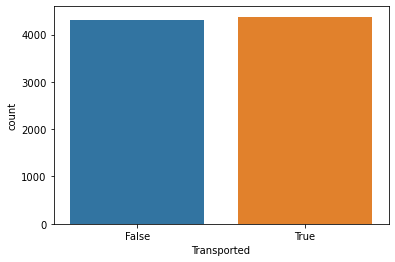

In [70]:
sns.countplot(x='Transported',data=df)

In [54]:
X_train.shape

(5796, 30)

In [55]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Missing,Deck_T,Side_Missing,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# Setup ML pipelines

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [62]:
pipelines= {
    'rf':make_pipeline(StandardScaler(),RandomForestClassifier(random_state=1234)),
    'gb':make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=1234))
}

In [58]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [71]:
grid={
    'rf':{
        'randomforestclassifier__n_estimators':[100,200,300]
        
    },
    
    'gb':{
        
        'gradientboostingclassifier__n_estimators':[100,200,300]
    }
}

In [74]:
#create a blank dictionary to hold the models
fit_models={}
#loop through all algos
for algo, pipeline in pipelines.items():
    model=GridSearchCV(pipeline,grid[algo],n_jobs=-1,cv=10)
    model.fit(X_train,y_train)
    fit_models[algo]=model

# Evaluacion de resultados

In [75]:
fit_models

{'rf': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('randomforestclassifier',
                                         RandomForestClassifier(random_state=1234))]),
              n_jobs=-1,
              param_grid={'randomforestclassifier__n_estimators': [100, 200,
                                                                   300]}),
 'gb': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('gradientboostingclassifier',
                                         GradientBoostingClassifier(random_state=1234))]),
              n_jobs=-1,
              param_grid={'gradientboostingclassifier__n_estimators': [100, 200,
                                                                       300]})}

In [76]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [78]:
for algo, pipeline in pipelines.items():
    yhat=model.predict(X_test)
    accuracy=accuracy_score(y_test,yhat)
    precision=precision_score(y_test,yhat)
    recall=recall_score(y_test,yhat)
    print(f'Metrics for {algo}:accuracy: {accuracy},  recall: {recall}, precision: {precision}')

Metrics for rf:accuracy: 0.8095813204508857,  recall: 0.8378164556962026, precision: 0.7980406932931424
Metrics for gb:accuracy: 0.8095813204508857,  recall: 0.8378164556962026, precision: 0.7980406932931424
